# A look at data from OpenDurham
We have a sample of some data from the end of Summer 2019 about the city of Durham, NC. Here we'll check out some basic information by importing it into pandas dataframes, and viewing with matplotlib.

In general, I would avoid storing data in your git repo. Depending on the data you want to look at it can easily grow to require a lot of storage space. This could also require chunking the data so it doesn't clog up your computer's memory. If it is big enough though, and you want to play with a repository on the road, it could slow down the process of pushing, pulling, and branching. However in this case since the three sets we have currently are easily managable, we'll let it slide for now.

In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sbrn

In [2]:
DPD_Crime = pandas.read_csv('data/DPD_Crime.csv')
DPD_Crime

,OBJECTID,INCI_ID,DATE_REPT,HOUR_REPT,YEARSTAMP,MONTHSTAMP,REPORTEDAS,UCR_CODE,CHRGDESC,ATTM_COMP,PREMISE,WEAPON,CSSTATUS,DIST,BEAT,ADDRESS2
0,1001,18043007,2018-12-06T15:36:00.000Z,1536,2018,12,MOTOR VEHICLE A,290,VANDALISM,COM,08,99,2,1,121,1500 GLENN SCHOOL RD
1,1002,18043012,2018-12-06T15:37:55.000Z,1537,2018,12,WARRANT OR SUBP,90Z,ALL OTHER OFFENSES-COURT VIOLATIONS,COM,11,,5,5,522,200 S MANGUM ST
2,1003,18043010,2018-12-06T15:41:54.000Z,1541,2018,12,LARCENY,23H,LARCENY - ALL OTHER,COM,RES2,99,1,3,313,500 S LASALLE ST
3,1004,18043013,2018-12-06T15:43:36.000Z,1543,2018,12,SHOPLIFTER,23C,LARCENY - SHOPLIFTING,COM,08,,5,3,321,4000 DURHAM CHAPEL HILL BLVD
4,1005,18043011,2018-12-06T15:44:20.000Z,1544,2018,12,LARCENY,23C,LARCENY - SHOPLIFTING,COM,08,,5,2,223,3500 N ROXBORO ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125485,124996,18040595,2018-11-18T09:42:52.000Z,942,2018,11,SUSPICIOUS ACT,9917,DEATH INVESTIGATION,COM,10,95,C,4,421,5600 BARBEE RD/CORONADO LN
125486,124997,18040598,2018-11-18T10:17:15.000Z,1017,2018,11,LARCENY OF VEHI,240,MOTOR VEHICLE THEFT,COM,RES1,,1,2,224,300 CHESAPEAKE AVE
125487,124998,18040597,2018-11-18T10:26:56.000Z,1026,2018,11,LOST OR FOUND P,9919,FOUND PROPERTY,COM,13,99,2,2,214,17600 I85 S
125488,124999,18040601,2018-11-18T11:36:53.000Z,1136,2018,11,LARCENY,23C,LARCENY - SHOPLIFTING,COM,07,99,1,3,314,2700 DURHAM CHAPEL HILL BLVD


In [3]:
DPD_Crime['REPORTEDAS'].unique()

array(['MOTOR VEHICLE A', 'WARRANT OR SUBP', 'LARCENY', 'SHOPLIFTER',
       'ASSIST EMS', 'FRAUD', 'BREAK IN', 'DISTURBANCE', 'HARASSMENT',
       'UNKNOWN PROBLEM', 'BREAK IN VEHICL', 'ARMED ROBBERY',
       'NOTIFY POLICE', 'VANDALISM', 'INTOXICATED DRI', 'ALARM',
       'RAPE NO EMS', 'VEHICLE STOP', 'SUSPICIOUS PERS', 'PRIVATE TOW',
       'WEAPONS VIOLATI', 'DISTURBANCE WIT', 'SUSPICIOUS VEHI',
       'GUNSHOT WOUND N', 'LARCENY OF VEHI', 'CARELESS AND RE', 'ASSAULT',
       'DRUGS', 'LARCENY - ALL O', 'FRAUD - IMPERSO', 'INDECENT',
       'DAMAGE TO PROPE', 'ABANDONED VEHIC', 'LOST OR FOUND P',
       'SEXUAL ASSAULT', 'MOTOR VEHICLE C', 'WANTED PERSON',
       'DOMESTIC VIOLEN', 'WELFARE CHECK', 'LOST PROPERTY',
       'UNAUTHORIZED US', 'FLOOD', 'HOLD UP ALARM', 'DOMESTIC WITH A',
       'HIT AND RUN', 'SUSPICIOUS PACK', 'THREATS', 'ASSIST PERSON',
       'TRESPASS OR UNW', 'COMMON LAW ROBB', 'FLAG DOWN',
       'CARDIAC OR RESP', 'TRAFFIC HAZARD', 'FOLLOW UP', 'STABBING',
   

In [4]:
# Compare this to the charge description
charges = DPD_Crime['CHRGDESC'].unique()
print(charges)
print(charges.size)

['VANDALISM' 'ALL OTHER OFFENSES-COURT VIOLATIONS' 'LARCENY - ALL OTHER'
 'LARCENY - SHOPLIFTING' 'CALLS FOR SERVICE (NO CRIME)' 'EMBEZZLEMENT'
 'FRAUD - CREDIT CARD/ATM' 'BURGLARY' 'LARCENY - FROM BUILDING'
 'SUSPICIOUS ACTIVITY' 'SIMPLE ASSAULT' 'ALL OTHER CRIMINAL OFFENSES'
 'DEATH INVESTIGATION' 'LARCENY - FROM MOTOR VEHICLE'
 'ROBBERY - INDIVIDUAL' 'RECOVERED STOLEN VEHICLE (OTHER JURISDICTION)'
 'DRIVING WHILE IMPAIRED' 'SEX OFFENSE - SEXUAL ASSAULT WITH AN OBJECT'
 'AGGRAVATED ASSAULT' 'DRUG/NARCOTIC VIOLATIONS' 'TOWED/ABANDONED VEHICLE'
 'FOUND PROPERTY' 'MOTOR VEHICLE THEFT' 'SEX OFFENSE - FONDLING'
 'SEX OFFENSE - STATUTORY RAPE' 'FRAUD - IMPERSONATION'
 'FRAUD - FALSE PRETENSE' 'PORNOGRAPHY/OBSCENE MATERIAL' 'INTIMIDATION'
 'BLACKMAIL/EXTORTION' 'SEX OFFENSE - FORCIBLE SODOMY'
 'COUNTERFEITING/FORGERY'
 'ALL OTHER OFFENSES-ESCAPE FROM CUSTODY OR RESIST ARREST'
 'ASSIST OTHER AGENCY' 'LOST PROPERTY' 'TRESPASSING'
 'FRAUD - UNAUTHORIZED USE OF CONVEYANCE' 'DISORDERLY CONDUCT'


In the above cell, although we asked for unique charges, we still obtain repeats because of an odd string formatting of the values. This won't matter so long as we use a search for text, without concern for the trailing whitespace.

In [5]:
# Let's first find out the time period when these crimes were reported
first_report = DPD_Crime['DATE_REPT'].min()
latest_report = DPD_Crime['DATE_REPT'].max()
print(first_report)
print(latest_report)

2015-01-01T00:00:00.000Z
2019-08-02T23:50:00.000Z


So this data covers the range from January 1st, 2015 to August 2nd, 2019

In [6]:
# How many bank robberies were there?
robberies = DPD_Crime[DPD_Crime.REPORTEDAS == 'BANK ROBBERY']
robberies.count()

OBJECTID      30
INCI_ID       30
DATE_REPT     30
HOUR_REPT     30
YEARSTAMP     30
MONTHSTAMP    30
REPORTEDAS    30
UCR_CODE      30
CHRGDESC      30
ATTM_COMP     30
PREMISE       30
WEAPON        30
CSSTATUS      30
DIST          30
BEAT          30
ADDRESS2      30
dtype: int64

In [7]:
# How many reported explosions?
explosions = DPD_Crime[DPD_Crime.REPORTEDAS == 'EXPLOSION']
explosions

,OBJECTID,INCI_ID,DATE_REPT,HOUR_REPT,YEARSTAMP,MONTHSTAMP,REPORTEDAS,UCR_CODE,CHRGDESC,ATTM_COMP,PREMISE,WEAPON,CSSTATUS,DIST,BEAT,ADDRESS2
1008,9,18041392,2018-11-25T00:40:36.000Z,40,2018,11,EXPLOSION,520,WEAPON VIOLATIONS,COM,RES3,14,5,2,224,5700 WHIPPOORWILL ST
21137,23138,15002974,2015-01-27T00:38:15.000Z,38,2015,1,EXPLOSION,200,ARSON,COM,18,,2,1,124,2400 KATE ST
106162,105163,18007462,2018-03-07T22:53:43.000Z,2253,2018,3,EXPLOSION,200,ARSON,COM,20,,2,1,114,1200 EVA ST


## Clean the data a little bit
As you can see in the cell below, the dates between date reported (DATE_REPT), and YEARSTAMP don't always agree. In fact it looks like there are over 1100 rows with a YEARSTAMP of 0. Let's fix this.

In [8]:
by_year = DPD_Crime.groupby(['YEARSTAMP','DATE_REPT'])
by_year.count()

OBJECTID  INCI_ID  HOUR_REPT  MONTHSTAMP  \
YEARSTAMP DATE_REPT                                                            
0         2017-01-20T00:00:00.000Z         2        2          2           2   
          2017-01-21T00:00:00.000Z         1        1          1           1   
          2017-01-22T00:00:00.000Z         2        2          2           2   
          2017-01-23T00:00:00.000Z         1        1          1           1   
          2017-01-24T00:00:00.000Z         3        3          3           3   
...                                      ...      ...        ...         ...   
2019      2019-08-02T18:42:00.000Z         1        1          1           1   
          2019-08-02T21:13:00.000Z         1        1          1           1   
          2019-08-02T23:10:00.000Z         1        1          1           1   
          2019-08-02T23:42:00.000Z         1        1          1           1   
          2019-08-02T23:50:00.000Z         1        1          1           1   

                                    REPORTEDAS  UCR_CODE  CHRGDESC  ATTM_COMP  \
YEARSTAMP DATE_REPT                                                             
0         2017-01-20T00:00:00.000Z           2         2         2          2   
          2017-01-21T00:00:00.000Z           1         1         1          1   
          2017-01-22T00:00:00.000Z           2         2         2          2   
          2017-01-23T00:00:00.000Z           1         1         1          1   
          2017-01-24T00:00:00.000Z           3         3         3          3   
...                                        ...       ...       ...        ...   
2019      2019-08-02T18:42:00.000Z           1         1         1          1   
          2019-08-02T21:13:00.000Z           1         1         1          1   
          2019-08-02T23:10:00.000Z           1         1         1          1   
          2019-08-02T23:42:00.000Z           1         1         1          1   
          2019-08-02T23:50:00.000Z           1         1         1          1   

                                    PREMISE  WEAPON  CSSTATUS  DIST  BEAT  \
YEARSTAMP DATE_REPT                                                         
0         2017-01-20T00:00:00.000Z        2       2         2     2     2   
          2017-01-21T00:00:00.000Z        1       1         1     1     1   
          2017-01-22T00:00:00.000Z        2       2         2     2     2   
          2017-01-23T00:00:00.000Z        1       1         1     1     1   
          2017-01-24T00:00:00.000Z        3       3         3     3     3   
...                                     ...     ...       ...   ...   ...   
2019      2019-08-02T18:42:00.000Z        1       1         1     1     1   
          2019-08-02T21:13:00.000Z        1       1         1     1     1   
          2019-08-02T23:10:00.000Z        1       1         1     1     1   
          2019-08-02T23:42:00.000Z        1       1         1     1     1   
          2019-08-02T23:50:00.000Z        1       1         1     1     1   

                                    ADDRESS2  
YEARSTAMP DATE_REPT                           
0         2017-01-20T00:00:00.000Z         2  
          2017-01-21T00:00:00.000Z         1  
          2017-01-22T00:00:00.000Z         2  
          2017-01-23T00:00:00.000Z         1  
          2017-01-24T00:00:00.000Z         3  
...                                      ...  
2019      2019-08-02T18:42:00.000Z         1  
          2019-08-02T21:13:00.000Z         1  
          2019-08-02T23:10:00.000Z         1  
          2019-08-02T23:42:00.000Z         1  
          2019-08-02T23:50:00.000Z         1  

[121795 rows x 14 columns]

In [9]:
# Similarly we have months where the MONTHSTAMP contains value 0. So we can adjust according to the date reported.
by_month = DPD_Crime.groupby(['MONTHSTAMP','DATE_REPT'])
print(by_month.count()['INCI_ID'])

# The brute force way to replace months requires 12 lines and lots of repetition. Will think about a more compact
# function to do this later
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-01-',regex=True),"MONTHSTAMP"] = 1
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-02-',regex=True),"MONTHSTAMP"] = 2
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-03-',regex=True),"MONTHSTAMP"] = 3
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-04-',regex=True),"MONTHSTAMP"] = 4
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-05-',regex=True),"MONTHSTAMP"] = 5
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-06-',regex=True),"MONTHSTAMP"] = 6
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-07-',regex=True),"MONTHSTAMP"] = 7
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-08-',regex=True),"MONTHSTAMP"] = 8
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-09-',regex=True),"MONTHSTAMP"] = 9
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-10-',regex=True),"MONTHSTAMP"] = 10
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-11-',regex=True),"MONTHSTAMP"] = 11
DPD_Crime.loc[DPD_Crime.DATE_REPT.str.contains('-12-',regex=True),"MONTHSTAMP"] = 12
Corrected_months = DPD_Crime.groupby(["MONTHSTAMP"])
print(Corrected_months.count()["INCI_ID"])

MONTHSTAMP  DATE_REPT               
0           2017-01-20T00:00:00.000Z    2
            2017-01-21T00:00:00.000Z    1
            2017-01-22T00:00:00.000Z    2
            2017-01-23T00:00:00.000Z    1
            2017-01-24T00:00:00.000Z    3
                                       ..
12          2018-12-31T22:29:28.000Z    1
            2018-12-31T22:36:01.000Z    1
            2018-12-31T23:10:12.000Z    1
            2018-12-31T23:40:37.000Z    1
            2018-12-31T23:59:56.000Z    1
Name: INCI_ID, Length: 121866, dtype: int64
MONTHSTAMP
1     11273
2      9854
3     11164
4     11625
5     12327
6     11616
7     12072
8      9411
9      8646
10     9345
11     8972
12     9185
Name: INCI_ID, dtype: int64


In [10]:
# Get a boolean series for each year of our data, where the reported date contains that year
rows_2015 = DPD_Crime.DATE_REPT.str.contains("2015")
rows_2016 = DPD_Crime.DATE_REPT.str.contains("2016")
rows_2017 = DPD_Crime.DATE_REPT.str.contains("2017")
rows_2018 = DPD_Crime.DATE_REPT.str.contains("2018")
rows_2019 = DPD_Crime.DATE_REPT.str.contains("2019")
rows_2015

0         False
1         False
2         False
3         False
4         False
          ...  
125485    False
125486    False
125487    False
125488    False
125489    False
Name: DATE_REPT, Length: 125490, dtype: bool

In [11]:
# Now update values in the YEARSTAMP column to match the boolean series we just created
# This is assuming that the reported date is always correct, and the YEARSTAMP is the more likely column to be wrong
DPD_Crime.loc[rows_2015,"YEARSTAMP"] = 2015
DPD_Crime.loc[rows_2016,"YEARSTAMP"] = 2016
DPD_Crime.loc[rows_2017,"YEARSTAMP"] = 2017
DPD_Crime.loc[rows_2018,"YEARSTAMP"] = 2018
DPD_Crime.loc[rows_2019,"YEARSTAMP"] = 2019
Corrected_years = DPD_Crime.groupby(["YEARSTAMP"])
Corrected_years.count()

,OBJECTID,INCI_ID,DATE_REPT,HOUR_REPT,MONTHSTAMP,REPORTEDAS,UCR_CODE,CHRGDESC,ATTM_COMP,PREMISE,WEAPON,CSSTATUS,DIST,BEAT,ADDRESS2
YEARSTAMP,,,,,,,,,,,,,,,
2015,24741,24741,24741,24741,24741,24672,24741,24741,24741,24741,24741,24741,24739,24679,24741
2016,27550,27550,27550,27550,27550,27315,27550,27550,27550,27550,27550,27550,27548,27353,27550
2017,27225,27225,27225,27225,27225,27129,27225,27225,27225,27225,27225,27225,27220,27065,27225
2018,27583,27583,27583,27583,27583,27493,27583,27583,27583,27583,27583,27583,27581,27449,27583
2019,18391,18391,18391,18391,18391,18344,18391,18391,18391,18391,18391,18391,18391,18281,18391


In [12]:
# There are also entries with the same INCI_ID, that is the incident ID number has been repeated
print(DPD_Crime.groupby(['INCI_ID']).count()['OBJECTID'].max())
duplicates = DPD_Crime[DPD_Crime.duplicated(subset='INCI_ID',keep=False)]
duplicates

2


,OBJECTID,INCI_ID,DATE_REPT,HOUR_REPT,YEARSTAMP,MONTHSTAMP,REPORTEDAS,UCR_CODE,CHRGDESC,ATTM_COMP,PREMISE,WEAPON,CSSTATUS,DIST,BEAT,ADDRESS2
7412,9413,19010367,2019-03-22T17:50:00.000Z,1750,2019,3,MISSING PERSON,90I,RUNAWAY ...,COM,13,99,C,4,411,1300 SCOUT DR
7413,9414,19010367,2019-03-22T17:50:00.000Z,1750,2019,3,MISSING PERSON,90I,RUNAWAY ...,COM,13,99,C,4,411,1300 SCOUT DR
13145,15146,19019354,2019-05-26T02:24:00.000Z,224,2019,5,MOTOR VEHICLE C,9915,CALLS FOR SERVICE (NO CRIME) ...,COM,,,6,4,423,3100 E CORNWALLIS RD/S MIAMI BLVD
13146,15147,19019354,2019-05-26T02:24:00.000Z,224,2019,5,MOTOR VEHICLE C,9915,CALLS FOR SERVICE (NO CRIME) ...,COM,13,,6,4,423,3100 E CORNWALLIS RD/S MIAMI BLVD
14621,16622,19021709,2019-06-11T00:00:00.000Z,1401,2019,6,SUSPICIOUS PERS,90Z,ALL OTHER OFFENSES-COURT VIOLATIONS,COM,RES1,99,2,2,222,2700 LANDIS DR
14622,16623,19021709,2019-06-11T00:00:00.000Z,1401,2019,6,SUSPICIOUS PERS,90Z,ALL OTHER OFFENSES-COURT VIOLATIONS ...,COM,RES1,90,2,2,222,2700 LANDIS DR
14677,16678,19021704,2019-06-11T13:22:00.000Z,1322,2019,6,MOTOR VEHICLE A,9915,CALLS FOR SERVICE (NO CRIME) ...,COM,13,,2,4,423,400 DAVIS DR/HOPSON RD
14678,16679,19021704,2019-06-11T13:22:00.000Z,1322,2019,6,MOTOR VEHICLE A,9915,CALLS FOR SERVICE (NO CRIME) ...,COM,,,2,4,423,400 DAVIS DR/HOPSON RD
15933,17934,19023656,2019-06-25T20:15:00.000Z,2015,2019,6,WELFARE CHECK,9915,CALLS FOR SERVICE (NO CRIME) ...,COM,RES6,,2,3,323,24100 ROSE GARDEN LN
15934,17935,19023656,2019-06-25T20:15:00.000Z,2015,2019,6,WELFARE CHECK,9915,CALLS FOR SERVICE (NO CRIME) ...,COM,03,99,2,3,323,24100 ROSE GARDEN LN


In the above cell, we can clearly see duplicated rows, where perhaps some data is missing between the two entries, but the values that exist in our dataset are definitely duplicates. While in this example there are a small number of duplicates, we should make a nice general function for comparing and removing repeats. Let's generally try to keep whichever row has more values.

In [16]:
columns = DPD_Crime.columns    
# This is the list of all INCI_ID values that are repeated
duplicate_inci_ids = duplicates["INCI_ID"].unique()
#print(duplicate_inci_ids)
# List to hold all of the OBJECTID values we plan to filter out of the data
ob_ids_to_ditch = []

for id_val in duplicate_inci_ids:
    # Create a dataframe that holds only the duplicate entries for each INCI_ID in our list of repeated INCI_IDs
    dupe_df = DPD_Crime[DPD_Crime["INCI_ID"]==id_val]
    ob_ids = dupe_df["OBJECTID"]
    #print(ob_ids.values)
    # In general, we may have more than two rows in the dupe_df dataframe. Since we do not always know a priori 
    # how many rows there will be, we only need to compare two at a time, while keeping track of which row we've 
    # seen that has the largest number of values. Then remove any rows besides that one.
    # Not sure if there is a more efficient method for doing this.
    
    # This check is redundant, by this point we should always have a length of ob_ids.values greater than 1
    if len(ob_ids.values) > 1:
        # keep track of the OBJECTID corresponding to the row with the most values, this will be the one we keep
        fullest_ob_id = -999
        for i in range(0,len(ob_ids.values)-1):
            row1_empty_cols = 0
            row2_empty_cols = 0
            for col in columns:
                # Get the values of both rows in the same column
                row1 = dupe_df[dupe_df["OBJECTID"]==ob_ids.values[i]][col]
                row2 = dupe_df[dupe_df["OBJECTID"]==ob_ids.values[i+1]][col]
                # Compare if the datatype is an 'object' (really we are looking for a string), and that the two
                # rows are different
                if row1.dtype == 'object' and row1.values[0].strip(' ') != row2.values[0].strip(' '):
                    # Now require that only one of them is empty.
                    # This will not change the count if both rows are empty, or if both rows are different
                    # but not empty
                    #TODO decide how to remove duplicates with some but not all values different
                    if row1.values[0].strip(' ') == '':
                        row1_empty_cols += 1
                    elif row2.values[0].strip(' ') == '':
                        row2_empty_cols += 1
                    
            if row1_empty_cols < row2_empty_cols:
                fullest_ob_id = ob_ids.values[i]
                #ob_ids_to_ditch.append(ob_ids.values[0])
            elif row2_empty_cols < row1_empty_cols:
                fullest_ob_id = ob_ids.values[i+1]
                #ob_ids_to_ditch.append(ob_ids.values[1])
        # Making the assumption that none of our OBJECTIDs will have the value -999, so we should be able to
        # use it as a placeholder and check that we actually decided on a row to remove.
        for ob in ob_ids.values:
            if fullest_ob_id != -999 and fullest_ob_id != ob:
                ob_ids_to_ditch.append(ob)

print(ob_ids_to_ditch)

[19010367 19019354 19021709 19021704 19023656 19025069]
[15146, 16679, 17934, 18826]


## Plotting some basic info about crimes in the city
Let's compare the change in number and rate of a few crimes over the years. For the rates, we will need some population data (or at least some very good guessing).

In [15]:
# Let's define a couple of arrays for formatting plots in the cells below
month_labels = ["January","February","March","April","May","June","July","August","September","October","November","December"]

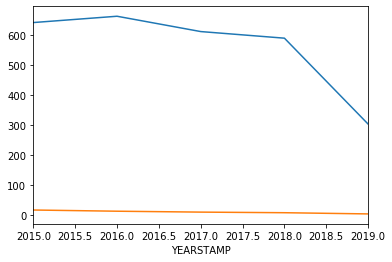

In [12]:
indiv_robberies = DPD_Crime[DPD_Crime["CHRGDESC"].str.contains("ROBBERY - INDIVIDUAL")]
pursesnatching =  DPD_Crime[DPD_Crime["CHRGDESC"].str.contains("LARCENY - PURSESNATCHING")]
indiv_robberies.groupby(["YEARSTAMP"]).count()["OBJECTID"].plot()
pursesnatching.groupby(["YEARSTAMP"]).count()["OBJECTID"].plot()

[ 1  2  3  4  5  6  7  8  9 10 11 12]
MONTHSTAMP
1     277
2     195
3     217
4     262
5     250
6     230
7     233
8     226
9     203
10    226
11    247
12    240
Name: INCI_ID, dtype: int64


([<matplotlib.axis.XTick at 0x119737c90>,
 <a list of 12 Text xticklabel objects>)

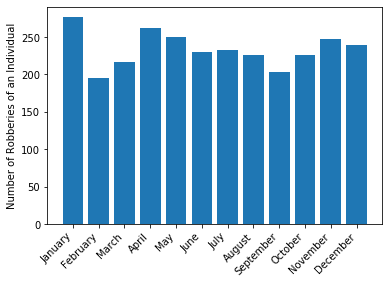

In [30]:
# Which month of the year has the most robberies of an individual?
print(indiv_robberies["MONTHSTAMP"].sort_values().unique())
print(indiv_robberies.groupby(["MONTHSTAMP"]).count()["INCI_ID"])
plt.bar(indiv_robberies["MONTHSTAMP"].sort_values().unique(),indiv_robberies.groupby(["MONTHSTAMP"]).count()["INCI_ID"])
plt.ylabel('Number of Robberies of an Individual')
plt.xticks(indiv_robberies["MONTHSTAMP"].sort_values().unique(),month_labels,rotation=45,horizontalalignment='right')

Whereas previously we might have wanted to look at a single charge out of the list, now we might want to compare multiple or all of the unique charges. This is where the trailing spaces can lead to unintentionally miscounting, so we need to do a little more cleaning. There are also some rows that do not correspond to a crime, which we will have to filter out.

In [32]:

print(DPD_Crime.groupby(["MONTHSTAMP","CHRGDESC"]).count()["INCI_ID"])
print(DPD_Crime.groupby(["MONTHSTAMP","CHRGDESC"]).count()["INCI_ID"].max())
DPD_Crime['CHRGDESC'].sort_values().str.rstrip(' ').unique()
#plt.scatter(DPD_Crime["MONTHSTAMP"].sort_values(),DPD_Crime.groupby(["MONTHSTAMP","CHRGDESC"]).count()["INCI_ID"])

0         12
1         12
2         12
3         12
4         12
          ..
125485    11
125486    11
125487    11
125488    11
125489    11
Name: MONTHSTAMP, Length: 125490, dtype: int64
MONTHSTAMP  CHRGDESC                                                    
1           AGGRAVATED ASSAULT                                              342
            AGGRAVATED ASSAULT                                               26
            ALL OTHER - HARASSING PHONE CALLS                                23
            ALL OTHER CRIMINAL OFFENSES                                      75
            ALL OTHER CRIMINAL OFFENSES                                       9
                                                                           ... 
12          VANDALISM TO PROP (NOT ACCIDENTAL)                              179
            WEAPON VIOLATIONS                                                 9
            WEAPON VIOLATIONS - ALL OTHER                                     3
            WEAPO

array(['AGGRAVATED ASSAULT', 'AGGRAVATED ASSAULT WITH SEXUAL MOTIVE',
       'ALL OTHER - HARASSING PHONE CALLS', 'ALL OTHER CRIMINAL OFFENSES',
       'ALL OTHER OFFENSES - HARASSING PHONE CALLS',
       'ALL OTHER OFFENSES-BIGAMY/MARRIAGE LAWS',
       'ALL OTHER OFFENSES-BLACKMAIL/EXTORTION',
       'ALL OTHER OFFENSES-BRIBERY',
       'ALL OTHER OFFENSES-CITY ORDINANCE VIOLATIONS',
       'ALL OTHER OFFENSES-COURT VIOLATIONS',
       'ALL OTHER OFFENSES-ESCAPE FROM CUSTODY OR RESIST ARREST',
       'ALL OTHER OFFENSES-KIDNAPPING',
       'ALL OTHER OFFENSES-PAROLE/PROBATION VIOLATIONS',
       'ALL OTHER OFFENSES-TRESPASSING', 'ALL TRAFFIC (EXCEPT DWI)',
       'ANIMAL CRUELTY', 'ARSON', 'ASSIST OTHER AGENCY',
       'BLACKMAIL/EXTORTION', 'BURGLARY', 'BURGLARY - FORCIBLE ENTRY',
       'BURGLARY - NON-FORCED ENTRY', 'CALLS FOR SERVICE (NO CRIME)',
       'COUNTERFEITING - BUYING/RECEIVING',
       'COUNTERFEITING - MANUFACTURING',
       'COUNTERFEITING - POSSESSING/CONCEALING',
 